- DAC-501 (Machine Learning), Assignment-2
- Suraj Chopra
- enroll: 24566024

# 2. data visualization

In [2]:
#libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<Axes: xlabel='total_bill', ylabel='tip'>

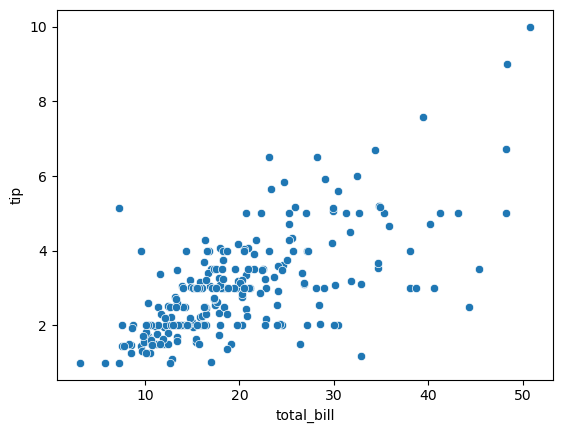

In [5]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip')

<Axes: xlabel='sex', ylabel='tip'>

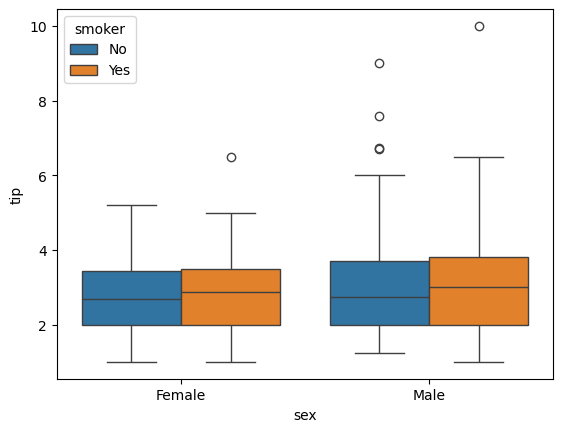

In [6]:
sns.boxplot(data = df, x = 'sex',y = 'tip',hue = 'smoker')

**Insight:**  
- Men pay more tips compared to women in general.
- Customers who Smoke end up paying more tip compared to ones who don't.

<Axes: xlabel='day', ylabel='tip'>

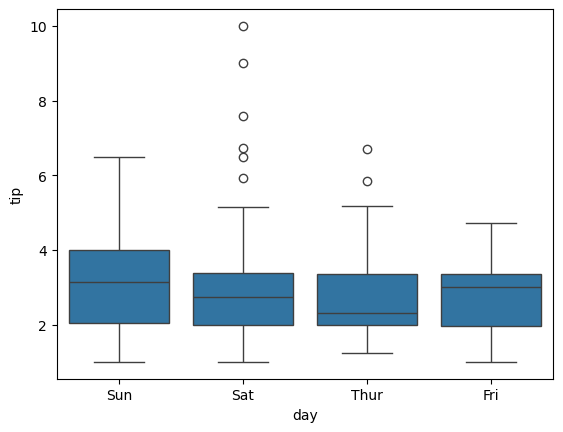

In [7]:
sns.boxplot(data = df, y = 'tip', x = 'day')#,hue = 'time')

**Insight:**
- In general, people are paying more tip on Sunday's compared to other days

<Axes: xlabel='time', ylabel='tip'>

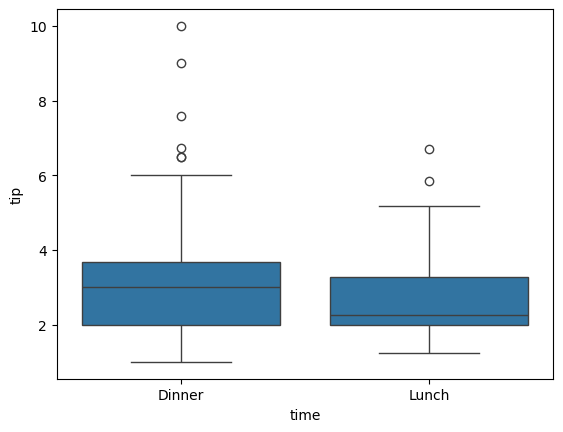

In [8]:
sns.boxplot(data = df, y = 'tip', x = 'time')#,x = 'time')

**Insight:**
- People are paying more tip during the Dinner time compared to Lunch. 

<Axes: xlabel='size', ylabel='tip'>

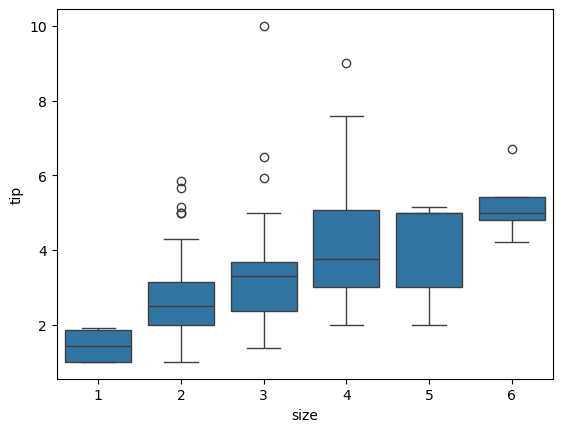

In [9]:
sns.boxplot(data = df,y = 'tip',x = 'size')

**Insight:**
- Larger groups are likely to tip more compared to smaller groups.

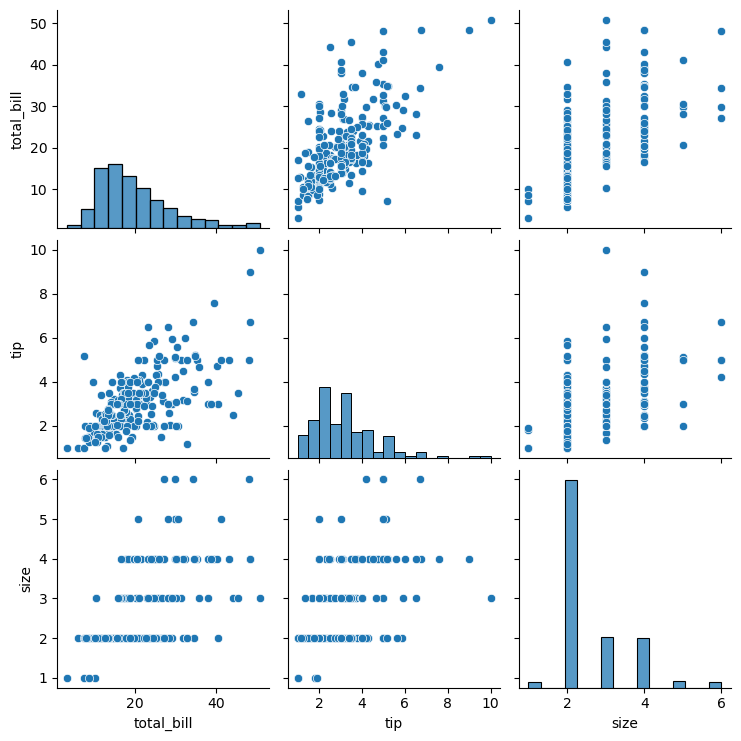

In [10]:
#pairplots
sns.pairplot(df)

In [11]:
#correlation matrix: (heatmap)
correlation_matrix = df[['total_bill', 'tip', 'size']].corr()
correlation_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


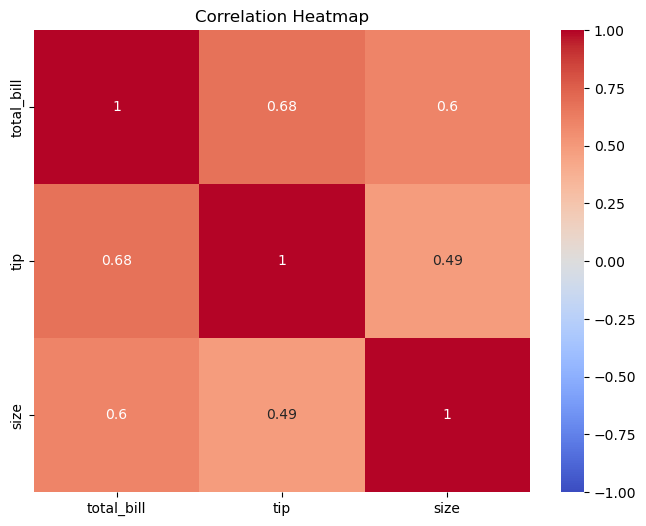

In [12]:
#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Insight:**
- there is positive correlation between total_bill amount and tip, so customers paying higher total-bill are likely to tip more.
- there is a positive correlation between the group size and tip amount, so larger groups are likely to pay more.

In [13]:
# rainbow test(statistical test for linearity)

import statsmodels.api as sm

X = df[['total_bill', 'size']]  # selecting numerical features for linear regression
y = df['tip']

# adding a constant to the features for the intercept term
X = sm.add_constant(X)

# fitting an OLS regression model
model = sm.OLS(y, X).fit()

rainbow_statistic, rainbow_p_value = sm.stats.linear_rainbow(model)

print("Rainbow Test Statistic:", rainbow_statistic)
print("p-value:", rainbow_p_value)

if rainbow_p_value < 0.05:
    print("The result is statistically significant, suggesting non-linearity.")
else:
    print("The result is not statistically significant, suggesting linearity.")




Rainbow Test Statistic: 1.190265664683282
p-value: 0.17048935693447384
The result is not statistically significant, suggesting linearity.


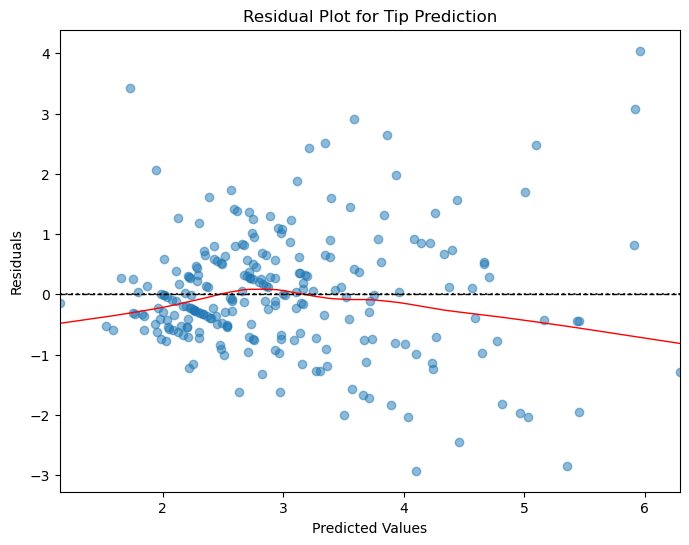

In [14]:
#residuals plot 

#adding a constant for the intercept term
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
residuals = y - predictions


plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, scatter_kws={'alpha': 0.5})
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Tip Prediction")
plt.show()


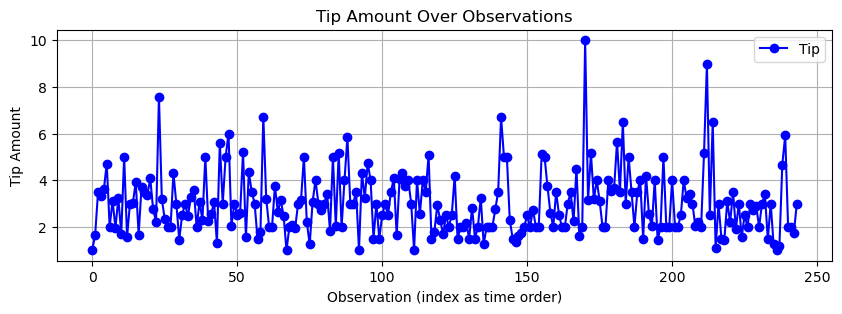

In [15]:
# line plot(on timeseries data) 
# (although there is no column indicating time in this dataframe,
#  we can still plot a lineplot considering oservations/ index no. as indicators of time)


plt.figure(figsize=(10, 3))
plt.plot(df.index, df['tip'], marker='o', linestyle='-', color='b', label='Tip')

plt.xlabel('Observation (index as time order)')
plt.ylabel('Tip Amount')
plt.title('Tip Amount Over Observations')
plt.legend()
plt.grid(True)
plt.show()


**Suggestions/ Actionable insights:**
- Based on the insights gathered from the visualization, the serving staff should focus more on larger groups in order to get more tip. The hotel/ restaurant could invest in better and larger tables to accomodate larger groups.
- Staff members, should focus on increasing more traffic during dinner compared to lunch or dinner to earn more tip. They could focus on adding more dinner specific items to the menu.
- Larger total bill amount earns more tip, so tip from one larger bill should be higher compared to many tips for smaller bill amounts. Management could promote items with higher bill amount on the menu. 
- Since smokers give more tips, management could invest on specific smoking sections. 
- Also since male customers are likely to give more tip, management could add elements to the hotel/ menu which appeal to male customers more. 

## 1. Based on trends observed so far we would plot regression models now

In [16]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


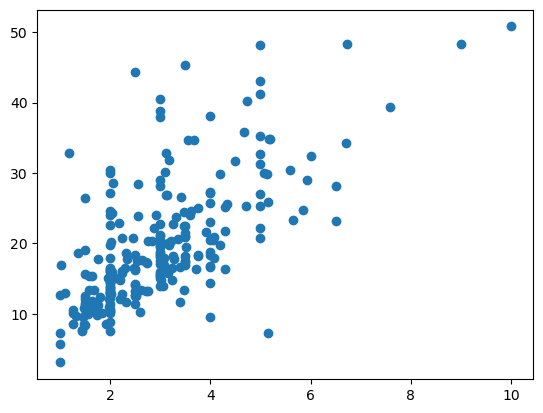

In [17]:
plt.scatter(df['tip'],df['total_bill'],)

#### data preparation

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('tip', axis=1)
y = df['tip']

# encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# scaling numerical features
scaler = StandardScaler()
X[['total_bill', 'size']] = scaler.fit_transform(X[['total_bill', 'size']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(195, 8)

In [19]:
X_train.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
228,-0.732309,-0.600193,True,False,True,False,False,False
208,0.504726,-0.600193,True,True,True,False,False,False
96,0.843531,-0.600193,True,True,False,False,False,False
167,1.342172,1.506958,True,False,False,True,False,False
84,-0.428397,-0.600193,True,False,False,False,True,True


#### Linear Regression with Grid Search

In [20]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression - Mean Squared Error:", mse)
print("Linear Regression - R^2 Score:", r2)


Linear Regression - Mean Squared Error: 0.7033566017436107
Linear Regression - R^2 Score: 0.4373018194348247


#### Ridge Regression with Grid Search


In [21]:
from sklearn.linear_model import Ridge

ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_reg = GridSearchCV(estimator = Ridge(), param_grid = ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression - Best Params:", ridge_reg.best_params_)
print("Ridge Regression - Mean Squared Error:", mse)
print("Ridge Regression - R^2 Score:", r2)


Ridge Regression - Best Params: {'alpha': 10.0}
Ridge Regression - Mean Squared Error: 0.6860533216172793
Ridge Regression - R^2 Score: 0.45114476086845823


#### Lasso Regression with Grid Search


In [22]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_reg = GridSearchCV(estimator = Lasso(), param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression - Best Params:", lasso_reg.best_params_)
print("Lasso Regression - Mean Squared Error:", mse)
print("Lasso Regression - R^2 Score:", r2)


Lasso Regression - Best Params: {'alpha': 0.1}
Lasso Regression - Mean Squared Error: 0.6121051239307194
Lasso Regression - R^2 Score: 0.5103046751866708


#### Decision Tree Regression with Grid Search


In [23]:
from sklearn.tree import DecisionTreeRegressor

#decision tree regression with grid search

dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree - Best Params:", dt_reg.best_params_)
print("Decision Tree - Mean Squared Error:", mse)
print("Decision Tree - R^2 Score:", r2)


Decision Tree - Best Params: {'max_depth': 5, 'min_samples_split': 10}
Decision Tree - Mean Squared Error: 1.0943309636291425
Decision Tree - R^2 Score: 0.1245151596732742


#### Random Forest Regression with Grid Search


In [24]:
from sklearn.ensemble import RandomForestRegressor

# random forest regressor with grid search to search the best model for the data
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
rf_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest - Best Params:", rf_reg.best_params_)
print("Random Forest - Mean Squared Error:", mse)
print("Random Forest - R^2 Score:", r2)


Random Forest - Best Params: {'max_depth': 5, 'n_estimators': 100}
Random Forest - Mean Squared Error: 0.8961959391435428
Random Forest - R^2 Score: 0.2830268129482998


#### Support Vector Regression (SVR) with Grid Search


In [25]:
from sklearn.svm import SVR

# support vector regression with grid search 
svr_params = {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 1.0], 'kernel': ['linear', 'rbf']}
svr_reg = GridSearchCV(estimator = SVR(), param_grid=svr_params, cv=5, scoring='neg_mean_squared_error')
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR - Best Params:", svr_reg.best_params_)
print("SVR - Mean Squared Error:", mse)
print("SVR - R^2 Score:", r2)


SVR - Best Params: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
SVR - Mean Squared Error: 0.6626608562518446
SVR - R^2 Score: 0.46985916216565704


#### K-Nearest Neighbors Regression (KNN) with Grid Search


In [26]:
from sklearn.neighbors import KNeighborsRegressor

# knn with Grid Search
knn_params = {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']}
knn_reg = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN - Best Params:", knn_reg.best_params_)
print("KNN - Mean Squared Error:", mse)
print("KNN - R^2 Score:", r2)


KNN - Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
KNN - Mean Squared Error: 0.8473220408163266
KNN - R^2 Score: 0.3221268279302829


#### comparing best models

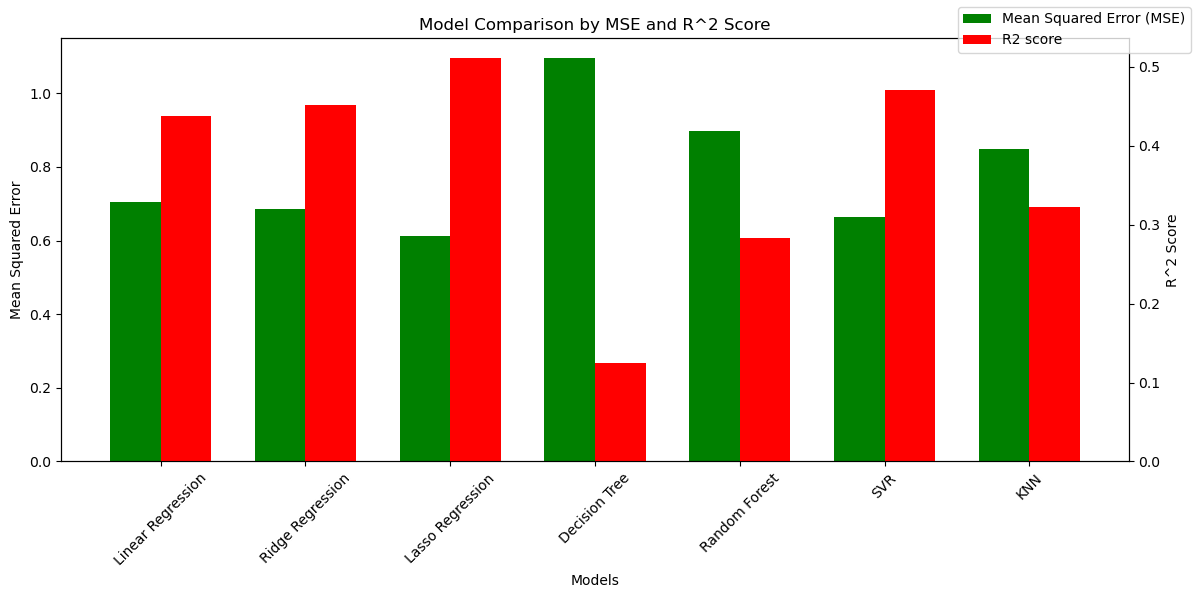

In [48]:
import numpy as np

model_names = list(model_results.keys())
mse_scores = [results['MSE'] for results in model_results.values()]
r2_scores = [results['R^2'] for results in model_results.values()]


fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(model_names))

# plotting mse score
bars1 = ax1.bar(index, mse_scores, bar_width, color='green', label="Mean Squared Error (MSE)")
ax1.set_xlabel("Models")
ax1.set_ylabel("Mean Squared Error")
ax1.set_title("Model Comparison by MSE and R^2 Score")
ax1.set_xticks(index+bar_width/2)
ax1.set_xticklabels(model_names, rotation=45)

# plotting r2 scores on a secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, r2_scores, bar_width, color='red', label="R2 score")
ax2.set_ylabel("R^2 Score")


fig.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [50]:
print("Model Performance Comparison:\n")
for model_name, results in model_results.items():
    print(f"{model_name}:")
    print(f"  - Mean Squared Error: {results['MSE']:.4f}")
    print(f"  - R^2 Score: {results['R^2']:.4f}")
    print()


Model Performance Comparison:

Linear Regression:
  - Mean Squared Error: 0.7034
  - R^2 Score: 0.4373

Ridge Regression:
  - Mean Squared Error: 0.6861
  - R^2 Score: 0.4511

Lasso Regression:
  - Mean Squared Error: 0.6121
  - R^2 Score: 0.5103

Decision Tree:
  - Mean Squared Error: 1.0943
  - R^2 Score: 0.1245

Random Forest:
  - Mean Squared Error: 0.8962
  - R^2 Score: 0.2830

SVR:
  - Mean Squared Error: 0.6627
  - R^2 Score: 0.4699

KNN:
  - Mean Squared Error: 0.8473
  - R^2 Score: 0.3221

